In [4]:
import pandas as pd
#import json
#import requests
#import pickle
df = pd.read_csv('dataReduced2.csv')
#df = df0.loc[df0['TARGET']!=2]
df.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,263934,1,1,0,0,0,112500.0,270000.0,13500.0,270000.0,...,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0,12.0
1,367366,0,1,0,1,0,45000.0,177903.0,8685.0,148500.0,...,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0,90.0
2,434796,0,1,0,0,1,130500.0,153000.0,7812.0,153000.0,...,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0,12.0


In [2]:
import pickle
#dfclient = df.loc[df['SK_ID_CURR'] == 263934]
    
feats = [f for f in df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV']]
X = df[feats].values 
    
model = pickle.load(open('model.pkl', 'rb'))
#result = model.predict_proba(X)
#result[0]

In [11]:
from lime import lime_tabular
# Définir l'explainer
explainer = lime_tabular.LimeTabularExplainer(X, mode="classification",
                                              feature_names=feats)

# L'appliquer à la ligne d'index 1 (2 minutes?)
idx = df.index[df["SK_ID_CURR"] == 263934]
exp = explainer.explain_instance(X[idx][0], model.predict_proba)

In [12]:
# imprimer les 5 principaux features
for i in range(5):
    print(f"{exp.as_list()[i][0]}: {exp.as_list()[i][1]:.2f}")

PREV_NAME_GOODS_CATEGORY_Education_MEAN <= 0.00: -0.05
ORGANIZATION_TYPE_Religion <= 0.00: 0.04
ORGANIZATION_TYPE_Industry: type 13 <= 0.00: -0.04
BURO_CREDIT_CURRENCY_currency 3_MEAN <= 0.00: -0.04
POS_NAME_CONTRACT_STATUS_Demand_MEAN <= 0.00: -0.04


In [28]:
# Créer liste de features
myfeatures = []
for i in range(5):
    myfeatures.append (exp.as_list()[i][0])

myfeatures

['PREV_NAME_GOODS_CATEGORY_Education_MEAN <= 0.00',
 'ORGANIZATION_TYPE_Religion <= 0.00',
 'ORGANIZATION_TYPE_Industry: type 13 <= 0.00',
 'BURO_CREDIT_CURRENCY_currency 3_MEAN <= 0.00',
 'POS_NAME_CONTRACT_STATUS_Demand_MEAN <= 0.00']

In [29]:
featuresArray = np.array(myfeatures)
featuresArray

array(['PREV_NAME_GOODS_CATEGORY_Education_MEAN <= 0.00',
       'ORGANIZATION_TYPE_Religion <= 0.00',
       'ORGANIZATION_TYPE_Industry: type 13 <= 0.00',
       'BURO_CREDIT_CURRENCY_currency 3_MEAN <= 0.00',
       'POS_NAME_CONTRACT_STATUS_Demand_MEAN <= 0.00'], dtype='<U47')

In [31]:
# Créer liste d'importances
myimportance = []
for i in range(5):
    myimportance.append (exp.as_list()[i][1])

myimportance

[-0.045082376862640994,
 0.043861057400846885,
 -0.04321978584828487,
 -0.036747346418318054,
 -0.03502179472419176]

In [32]:
featuresImportance = np.array(myimportance)
featuresImportance

array([-0.04508238,  0.04386106, -0.04321979, -0.03674735, -0.03502179])

In [ ]:
from matplotlib import pyplot as plt

<BarContainer object of 5 artists>

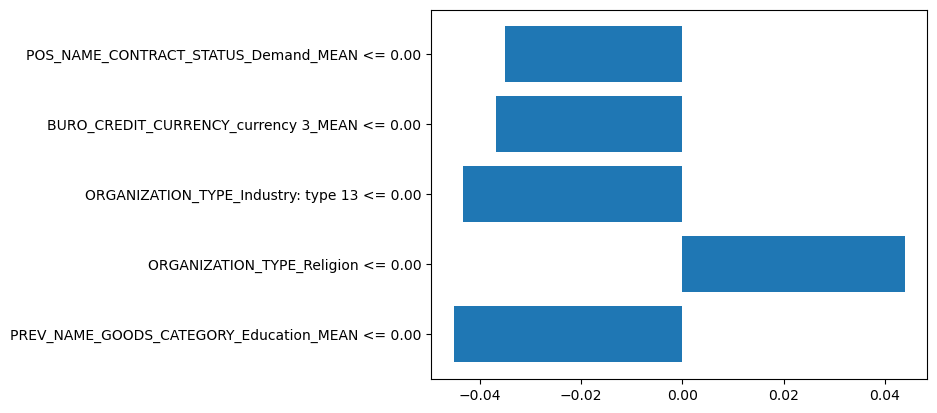

In [35]:
plt.barh(myfeatures, myimportance)

In [15]:
# Serializing json  
json_object = json.dump(exp, indent = 4) 
print(json_object)

TypeError: dump() missing 1 required positional argument: 'fp'

In [16]:
with open("sample.json", "w") as outfile:
    json.dump(exp, outfile)

TypeError: Object of type Explanation is not JSON serializable

In [5]:
import requests
import json

In [9]:
def request_prediction(idClient) : 
    request = requests.post(url="http://127.0.0.1:8000/prediction",
                        data=json.dumps({'idClient': idClient}),
                        headers={"Content-Type": "application/json"})
    
    return request.json()

In [10]:
pred = request_prediction(263934)#['resultat']
       

JSONDecodeError: Expecting value: line 1 column 1 (char 0)